In [1]:
from matplotlib import pyplot as plt
from numpy import linalg as LA
import random
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
def train_split(l,train_percent):
    random.seed(2019)
    random.shuffle(l)
    cut = int(len(l)*train_percent)
    return l[:cut],l[cut:]

In [3]:
data_path ="./AVR_data/"
folder_path = os.listdir(data_path)
folder_path = [data_path+x for x in folder_path]
train_image_names = []
test_image_names = []

for path in folder_path:
    image_names = os.listdir(path)
    image_names = [path +"/"+x for x in image_names ]
    tra,tes = train_split(image_names,0.8)
    train_image_names=train_image_names + tra
    test_image_names=test_image_names +tes

In [4]:
train_paths,test_paths  = train_image_names , test_image_names 
image_paths = train_paths

In [5]:
image_paths[0]

'./AVR_data/Vivek/VivekS_CO_08.jpg'

In [6]:
all_images = []
for i in image_paths:
    img = cv2.imread(i,0)
    img = cv2.resize(img,(256,256),interpolation = cv2.INTER_CUBIC)
    all_images.append(img.reshape((256*256)))

In [7]:
all_images = np.array(all_images)

In [8]:
all_images.shape

(685, 65536)

In [9]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye_tree_eyeglasses.xml')

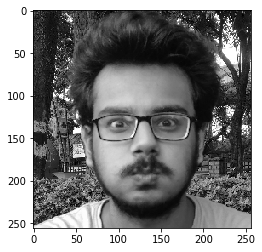

In [10]:
img=all_images[0].reshape((256,256))
plt.imshow(img,cmap='gray')

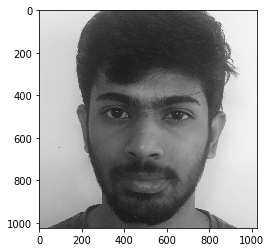

In [104]:
img = cv2.imread(image_paths[400])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

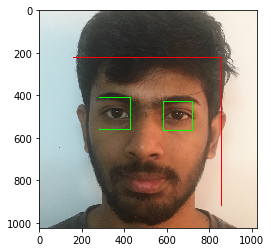

In [105]:
faces = face_cascade.detectMultiScale(gray, 1.3, 2)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    roi_eye_color=[]
    roi_eye_gray=[]

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        roi_eye_color.append(roi_color[ey:ey+eh, ex:ex+ew])
        roi_eye_gray.append(roi_gray[ey:ey+eh, ex:ex+ew])

    
plt.imshow(img,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe1e70a5208>,
 Text(0.5,1,'Face'))

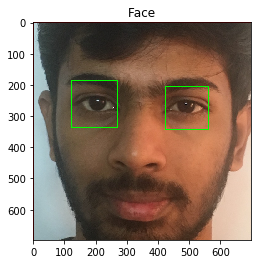

In [106]:
plt.subplot(111),plt.imshow(roi_color,cmap='gray'),plt.title('Face')


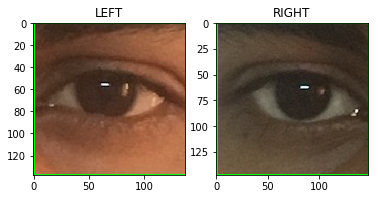

In [107]:
plt.subplot(121),plt.imshow(roi_eye_color[0],cmap='gray'),plt.title('LEFT')
plt.subplot(122),plt.imshow(roi_eye_color[1],cmap='gray'),plt.title('RIGHT')
plt.savefig('./outputs/plot1')
plt.show()

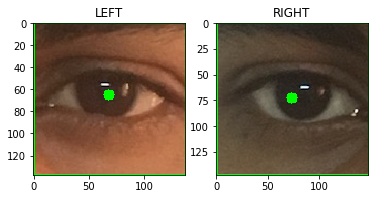

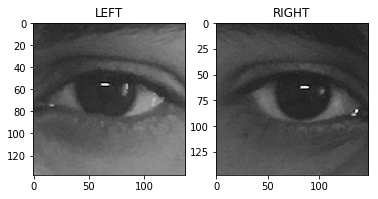

In [123]:


# convert the grayscale image to binary image
ret1,thresh1 = cv2.threshold(roi_eye_gray[0],70,255,0)
ret2,thresh2 = cv2.threshold(roi_eye_gray[1],12,255,0)
# thresh1=thresh1.astype(np.uint8)
# calculate moments of binary image
M1 = cv2.moments(thresh1)
M2 = cv2.moments(thresh2)
 
# calculate x,y coordinate of center
cX1 = int(M1["m10"] / M1["m00"])
cY1 = int(M1["m01"] / M1["m00"])

cX2 = int(M2["m10"] / M2["m00"])
cY2 = int(M2["m01"] / M2["m00"])

eye1=roi_eye_color[0].copy()
eye2=roi_eye_color[1].copy()
# put text and highlight the center
eye1x=cX1-10
eye1y=cY1-15
eye2x=cX2
eye2y=cY2
cv2.circle(eye1, (cX1-10, cY1-15), 5, (0, 255, 0), -1)
# cv2.putText(eye1, "centroid", (cX1 - 25, cY1 - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
# cv2.rectangle(eye1,(cX1-25,cY1-15+20),(cX1+15+15,cY1+15-20),(0,255,0),2)

cv2.circle(eye2, (cX2, cY2), 5, (0, 255, 0), -1)
# cv2.putText(eye2, "centroid", (cX2 - 25, cY2 - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
# cv2.rectangle(eye2,(cX2-15,cY2-15),(cX2+15,cY2+16),(0,255,0),2)

# display the image
plt.subplot(121),plt.imshow(eye1,'gray'),plt.title('LEFT')
plt.subplot(122),plt.imshow(eye2,'gray'),plt.title('RIGHT')
plt.savefig('./outputs/plot2')
plt.show()
plt.subplot(121),plt.imshow(roi_eye_gray[0],'gray'),plt.title('LEFT')
plt.subplot(122),plt.imshow(roi_eye_gray[1],'gray'),plt.title('RIGHT')
plt.show()

In [93]:
np.min(roi_eye_gray[0])

51

In [35]:
np.min(roi_eye_gray[1])

13

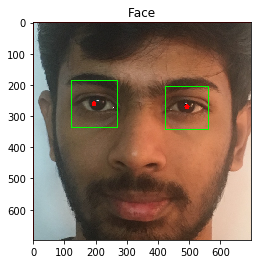

In [124]:
roi_color1=roi_color.copy()
cv2.circle(roi_color1, (eye1x+eyes[0][0], eye1y+eyes[0][1]), 8, (255, 0, 0), -1);
cv2.circle(roi_color1, (eye2x+eyes[1][0], eye2y+eyes[1][1]), 8, (255, 0, 0), -1);

plt.imshow(roi_color1,cmap='gray'),plt.title('Face')
plt.savefig('./outputs/plot3')
plt.show()

In [37]:
eyes[0][0]

133

In [38]:
import math
p1 = [eye1x+eyes[0][0], eye1y+eyes[0][1]]
p2 = [eye2x+eyes[1][0], eye2y+eyes[1][1]]
distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )

In [39]:
distance

220.11133546457802

In [43]:
image= roi_color.copy()
small = cv2.resize(image, (0,0), fx=128/distance, fy=128/distance) 
plt.imshow(small,cmap='gray'),plt.title('ScaledFace')
plt.show()

NameError: name 'distance' is not defined

In [41]:
p1 = [eye1x+(eyes[0][0]*(128/distance)), eye1y+(eyes[0][1]*(128/distance))]
p2 = [eye2x+(eyes[1][0]*(128/distance)), eye2y+(eyes[1][1]*(128/distance))]
distance2 = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
distance2

125.46607830018401

In [45]:
nose_cascade = cv2.CascadeClassifier('./haarcascade_mcs_nose.xml')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe1e705c748>,
 Text(0.5,1,'Nose'))

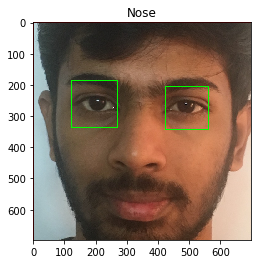

In [115]:
nose = nose_cascade.detectMultiScale(roi_gray)
roi_nose_color=[]
roi_nose_gray=[]
for (ex,ey,ew,eh) in nose:
    roi_nose_color.append(roi_color[ey:ey+eh, ex:ex+ew])
    roi_nose_gray.append(roi_gray[ey:ey+eh, ex:ex+ew])
plt.subplot(111),plt.imshow(roi_color,cmap='gray'),plt.title('Nose')

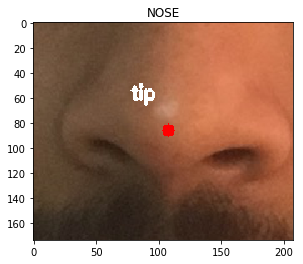

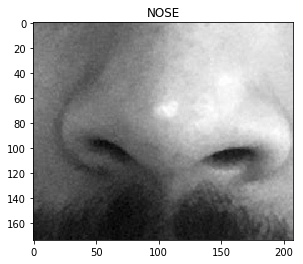

In [125]:
# convert the grayscale image to binary image
ret3,thresh3 = cv2.threshold(roi_nose_gray[0],12,255,0)
# thresh1=thresh1.astype(np.uint8)
# calculate moments of binary image
M3 = cv2.moments(thresh3)
 
# calculate x,y coordinate of center
cX3 = int(M3["m10"] / M3["m00"])
cY3 = int(M3["m01"] / M3["m00"])

nose1=roi_nose_color[0].copy()
# put text and highlight the center
nose1x=cX3+5
nose1y=cY3

cv2.circle(nose1, (cX3+5, cY3), 5, (255, 0, 0), -1)
cv2.putText(nose1, "tip", (cX3 - 25, cY3 - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)


# display the image
plt.subplot(111),plt.imshow(nose1,'gray'),plt.title('NOSE')
plt.savefig('./outputs/plot4')
plt.show()
plt.subplot(111),plt.imshow(roi_nose_gray[0],'gray'),plt.title('NOSE')
plt.show()

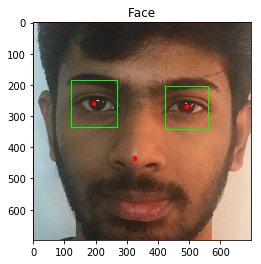

In [126]:
roi_color2=roi_color1.copy()
cv2.circle(roi_color2, (nose1x+nose[0][0], nose1y+nose[0][1]), 8, (255, 0, 0), -1);

plt.imshow(roi_color2,cmap='gray'),plt.title('Face')
plt.savefig('./outputs/plot5')
plt.show()

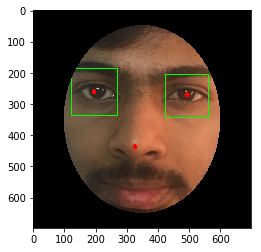

In [127]:
image=roi_color2

# create a mask image of the same shape as input image, filled with 0s (black color)
mask = np.zeros_like(image)
rows, cols,_ = mask.shape

# create a white filled ellipse
mask=cv2.ellipse(mask,(int(rows/2), int(cols/2)), (250,300), angle=0, startAngle=0, endAngle=360, color=(255,255,255), thickness=-1)

# Bitwise AND operation to black out regions outside the mask
result = np.bitwise_and(image,mask)

# Plotting the results
plt.subplot(111),plt.imshow(result,'gray')
plt.savefig('./outputs/plot6')
plt.show()

In [47]:
train_images=[]
for i in image_paths:
    img = cv2.imread(i)
    train_images.append(img)

In [48]:
test_images=[]
for i in test_paths:
    img = cv2.imread(i)
    test_images.append(img)

In [53]:
def train_test_split(lst, percent, j):
    cut = int(len(lst)*percent)
    labels = [j]*len(lst)
    return lst[:cut], lst[cut:], labels[:cut], labels[cut:]

train_image_names = []
test_image_names = []
train_labels = []
test_labels = []
j = 0

tra, tes, tra_labels, tes_labels = train_test_split(image_names, 0.8, j)
train_image_names.extend(tra)
test_image_names.extend(tes)
train_labels.extend(tra_labels)
test_labels.extend(tes_labels)
j =  j + 1

shuffle(train_image_names, train_labels);


train_images = []
test_images = []
imgs = []
for image in train_image_names:
    img = cv2.imread(image,1)
    train_images.append(img)
    imgs.append(img)
for image in test_image_names:
    img = cv2.imread(image,1)
    test_images.append(img)
    imgs.append(img)
print(len(train_images))

16


(<matplotlib.axes._subplots.AxesSubplot at 0x7f99cd4a3198>,
 <matplotlib.image.AxesImage at 0x7f99cd434780>)

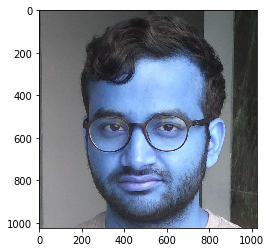

In [54]:
plt.subplot(111),plt.imshow(train_images[0],'gray')

In [55]:
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from skimage import feature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.utils import shuffle
import face_recognition
import argparse

In [56]:
knownEncodings= []
knownLabels = []
for i in range(len(train_images)):
    rgb = cv2.cvtColor(train_images[i],cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(rgb)
    encodings = face_recognition.face_encodings(rgb,boxes)
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownLabels.append(train_labels[i])

# len(knownLabels)

unknownEncodings = []
openface_labels = []
openface_test_labels = []
for i in range(len(test_images)):
    rgb = cv2.cvtColor(test_images[i],cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(rgb)
    encodings = face_recognition.face_encodings(rgb,boxes)
    for encoding in encodings:
        matches = face_recognition.compare_faces(knownEncodings,encoding)
        if True in matches:
            matchedIdxs = [j for (j,b) in enumerate(matches) if b]
            counts = {}
        for j in matchedIdxs:
            test_name = knownLabels[j]
            counts[test_name] = counts.get(test_name,0)+1
        label = max(counts,key=counts.get)
    openface_labels.append(label)
    openface_test_labels.append(test_labels[i])

# print(len(openface_labels))
# len(openface_test_labels)

accuracy_score(openface_labels,openface_test_labels)

1.0